In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pydataset
import scipy.stats


In [167]:
dataset = pd.read_csv("SraRunInfo.csv")

# Characterizing the data labeled with the serotypes

In [168]:
# Partition of the data according to serotype
non_labeled = dataset[(dataset.ScientificName == "Dengue virus") | (dataset.ScientificName == "Orthoflavivirus denguei")] 
type1 = dataset[(dataset.ScientificName == "dengue virus type 1") | (dataset.ScientificName == "dengue virus type I")]
type2 = dataset[(dataset.ScientificName == "dengue virus type 2") | (dataset.ScientificName == "Dengue virus type I") | (dataset.ScientificName == "Dengue virus 2 16681-PDK53")]
type3 = dataset[dataset.ScientificName == "dengue virus type 3"]
type4 = dataset[dataset.ScientificName == "dengue virus type 4"]
labeled = dataset[(dataset.ScientificName != "Dengue virus") & (dataset.ScientificName != "Orthoflavivirus denguei")]

non_labeled_length = non_labeled.shape[0]
type1_length = type1.shape[0]
type2_length = type2.shape[0]
type3_length = type3.shape[0]
type4_length = type4.shape[0]
labeled_length = type1_length +  type2_length + type3_length + type4_length
print("Number of samples: " + str(non_labeled_length + labeled_length) + ", representing " + str(sum(dataset["size_MB"])/1000) +" Gb of data (.sra)")
print("I) Number of samples non labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(non_labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("II) Number of samples labeled with serotype: " + str(non_labeled_length) + ", representing " + str(sum(labeled["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 1: " + str(type1_length) + ", representing " + str(sum(type1["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 2: " + str(type2_length) + ", representing " + str(sum(type2["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 3: " + str(type3_length) + ", representing " + str(sum(type3["size_MB"])/1000) +" Gb of data (.sra)")
print("    - Number of samples labeled as type 4: " + str(type4_length) + ", representing " + str(sum(type4["size_MB"])/1000) +" Gb of data (.sra)")

Number of samples: 9884, representing 2163.144 Gb of data (.sra)
I) Number of samples non labeled with serotype: 9146, representing 1956.73 Gb of data (.sra)
II) Number of samples labeled with serotype: 9146, representing 206.414 Gb of data (.sra)
    - Number of samples labeled as type 1: 284, representing 94.118 Gb of data (.sra)
    - Number of samples labeled as type 2: 304, representing 29.624 Gb of data (.sra)
    - Number of samples labeled as type 3: 136, representing 70.166 Gb of data (.sra)
    - Number of samples labeled as type 4: 14, representing 1.248 Gb of data (.sra)


Text(0.5, 1.0, 'Proportion of samples labeled with serotypes')

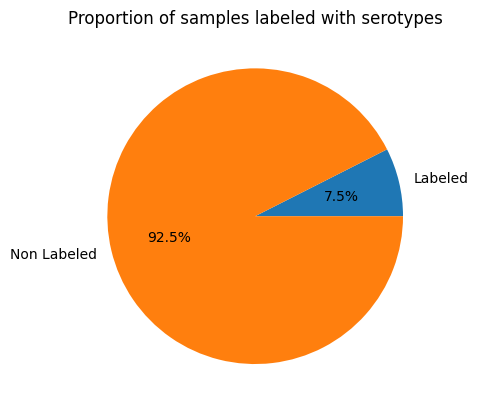

In [169]:

labels = 'Labeled', 'Non Labeled'
sizes = [labeled_length, non_labeled_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of samples labeled with serotypes")

Text(0.5, 1.0, 'Proportion of data (in format .sra) labeled with serotypes')

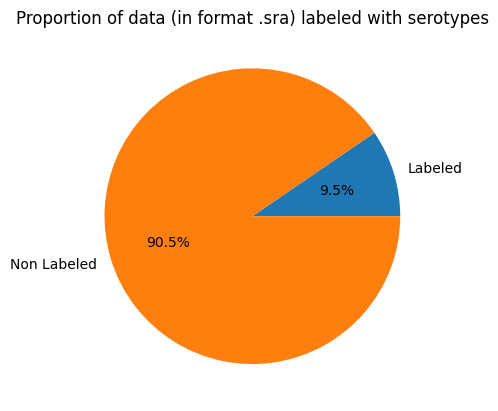

In [170]:
labels = 'Labeled', 'Non Labeled'
sizes = [sum(labeled["size_MB"]), sum(non_labeled["size_MB"])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (in format .sra) labeled with serotypes")


Text(0.5, 1.0, 'Proportion of samples labeled with each serotypes')

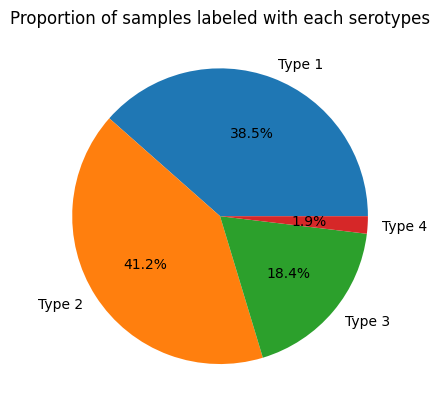

In [171]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [type1_length, type2_length, type3_length, type4_length]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of samples labeled with each serotypes")

Text(0.5, 1.0, 'Proportion of data (.sra) labeled with each serotypes')

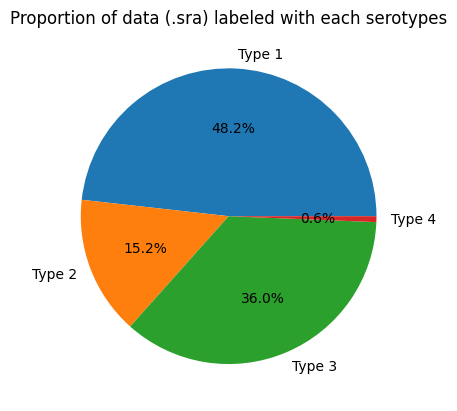

In [172]:
labels = 'Type 1', 'Type 2', 'Type 3', 'Type 4'
sizes = [sum(type1["size_MB"])/1000, sum(type2["size_MB"])/1000, sum(type3["size_MB"])/1000, sum(type4["size_MB"])/1000]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of data (.sra) labeled with each serotypes")

# Characterizing  the data

Note that some fields (eg. Sex,Disease,Affection_Status,Histological_Type,Body_Site) are empty for all entries. The data seems to repeat after row 5000 (TODO: see if it is really the case, check why, and rerun with correct dataset if necessary)

## Strategies (LibraryStrategy header)

In [173]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# STEP 0: Make sure you have these five real DataFrames in your namespace:
#         labeled, type1, type2, type3, type4
#
# e.g.
#    labeled = pd.read_csv("labeled.csv")
#    type1   = pd.read_csv("type1.csv")
#    … etc …
# -----------------------------------------------------------------------------

# Bundle them into lists so the function itself never needs more arguments
_TYPE_DFS    = [type1, type2, type3, type4]
_TYPE_LABELS = ["Type 1",    "Type 2",    "Type 3",    "Type 4"]
_COLORS      = ['r',         'b',         'y',         'g']

def plot_by_column(col):
    """
    Plots a stacked bar chart of the counts of each distinct value in
    `labeled[col]` across the four DataFrames type1..type4.

    Only argument:
      col (str): the column name to inspect in all five DataFrames.
    """
    # 1) Get the list of categories from the reference DataFrame
    cats = labeled[col].dropna().unique()

    # 2) We'll stack bars on top of each other:
    bottom = np.zeros(len(cats), dtype=int)

    # 3) For each of the type‐DataFrames compute counts & draw its layer
    for df, lbl, color in zip(_TYPE_DFS, _TYPE_LABELS, _COLORS):
        # value_counts() → Series indexed by category
        vc = df[col].value_counts().reindex(cats, fill_value=0)
        counts = vc.values

        plt.bar(cats, counts, bottom=bottom, color=color, label=lbl)
        bottom += counts

    # 4) Finalize
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Stacked counts of '{col}' by type")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Strategies used (whole dataset)')

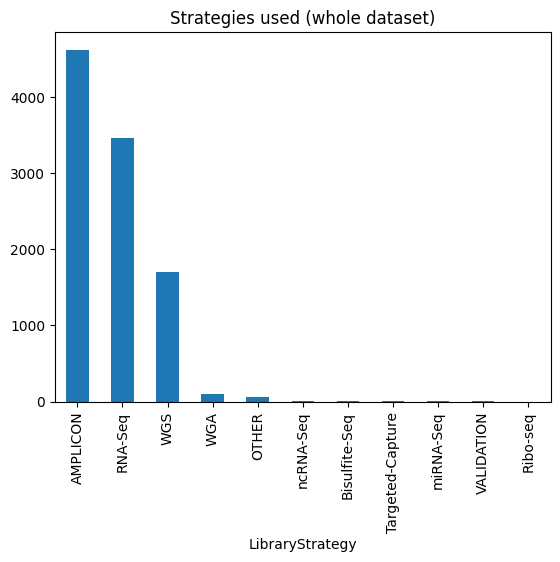

In [174]:
dataset["LibraryStrategy"].value_counts().plot(kind = 'bar')
plt.title("Strategies used (whole dataset)")

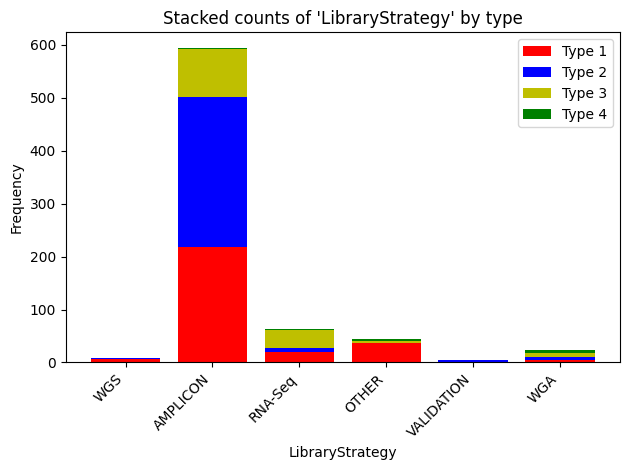

In [175]:
plot_by_column("LibraryStrategy")


Text(0.5, 1.0, 'Strategies used (type 4 only, for visibility)')

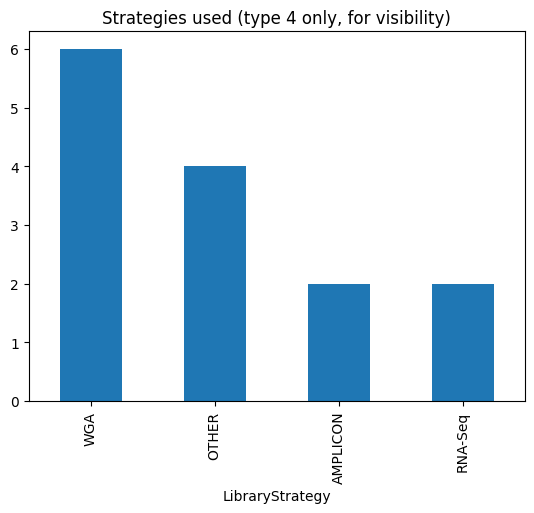

In [176]:
type4["LibraryStrategy"].value_counts().plot(kind = 'bar')
plt.title("Strategies used (type 4 only, for visibility)")

## Source (LibrarySource header)

Text(0.5, 1.0, 'Sources used (whole dataset)')

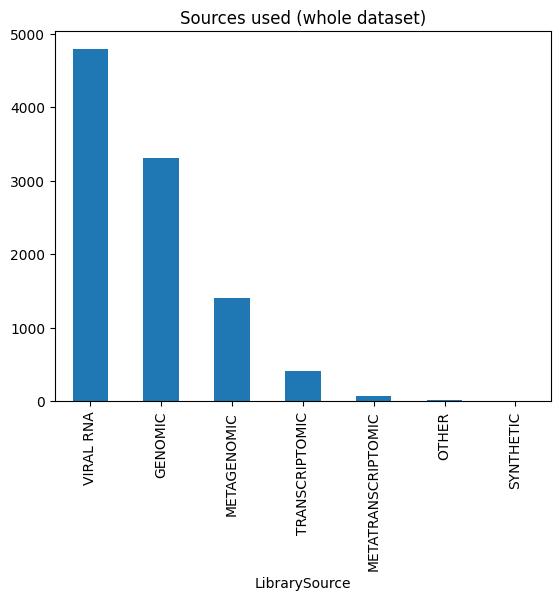

In [177]:
dataset["LibrarySource"].value_counts().plot(kind = 'bar')
plt.title("Sources used (whole dataset)")

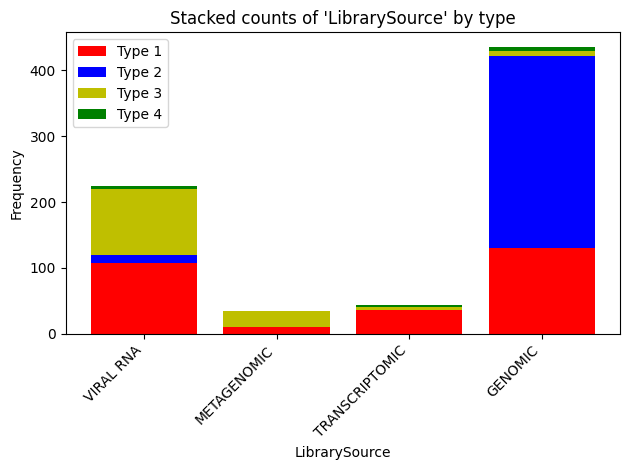

In [178]:
plot_by_column("LibrarySource")

Text(0.5, 1.0, 'Sources used (type 4 only, for visibility)')

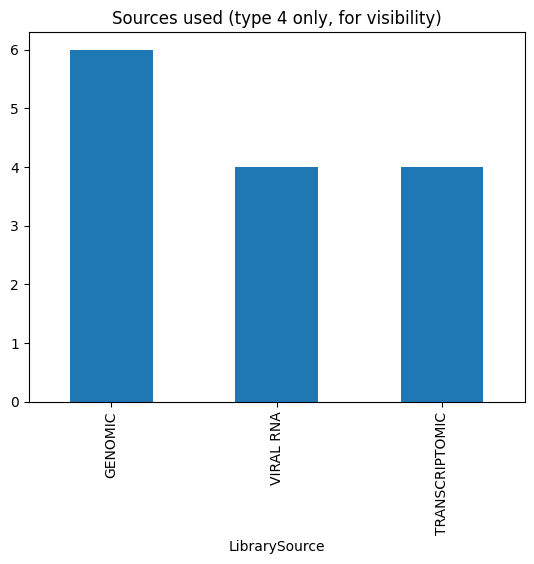

In [179]:
type4["LibrarySource"].value_counts().plot(kind = 'bar')
plt.title("Sources used (type 4 only, for visibility)")

## Selection (LibrarySelection header)

Text(0.5, 1.0, 'Selections used (whole dataset)')

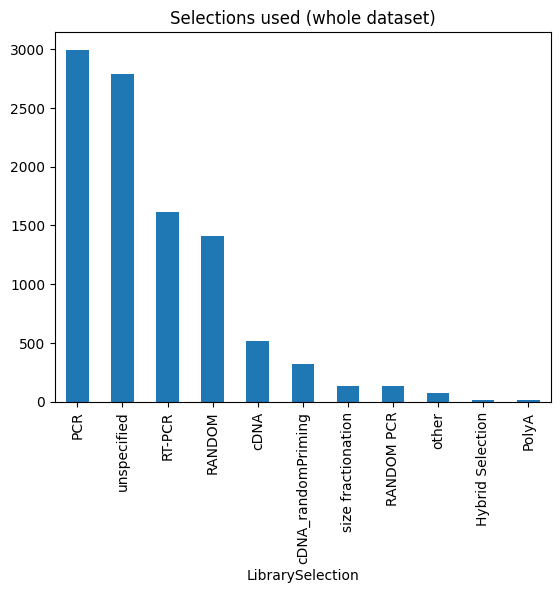

In [180]:
dataset["LibrarySelection"].value_counts().plot(kind = 'bar')
plt.title("Selections used (whole dataset)")

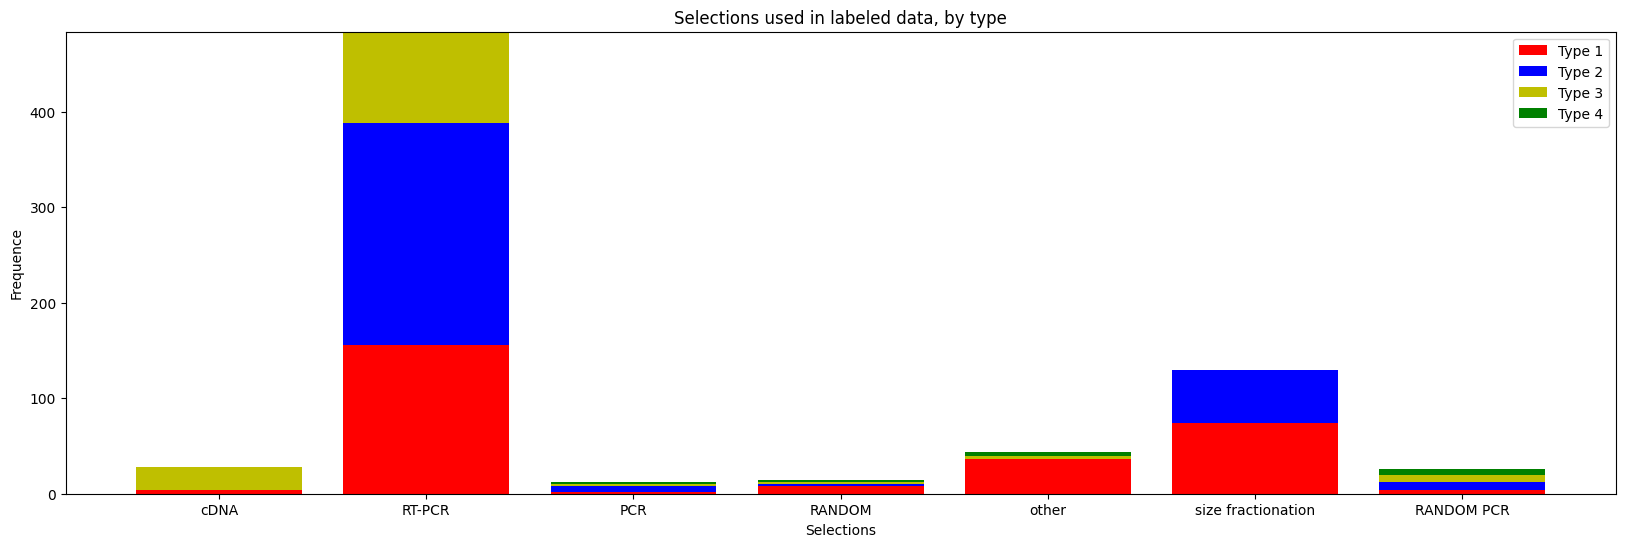

In [181]:
distinctSelections = labeled["LibrarySelection"].unique()
type1_selections = np.array([type1[type1.LibrarySelection == i].shape[0] for i in distinctSelections])
type2_selections = np.array([type2[type2.LibrarySelection == i].shape[0] for i in distinctSelections])
type3_selections = np.array([type3[type3.LibrarySelection == i].shape[0] for i in distinctSelections])
type4_selections = np.array([type4[type4.LibrarySelection == i].shape[0] for i in distinctSelections])

plt.figure(figsize=(20, 6))
plt.bar(distinctSelections, type1_selections, color='r')
plt.bar(distinctSelections, type2_selections, bottom=type1_selections, color='b')
plt.bar(distinctSelections, type3_selections, bottom=type1_selections + type2_selections, color='y')
plt.bar(distinctSelections, type4_selections, bottom=type1_selections + type2_selections + type3_selections, color='g')
plt.xlabel("Selections")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Selections used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Selections used (type 4 only for visibility)')

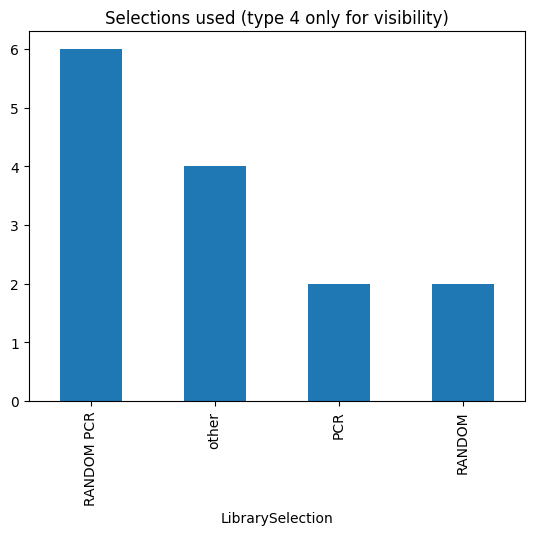

In [182]:
type4["LibrarySelection"].value_counts().plot(kind = 'bar')
plt.title("Selections used (type 4 only for visibility)")

## Models of the sequencers (Model header)

Text(0.5, 1.0, 'Platforms used (whole dataset)')

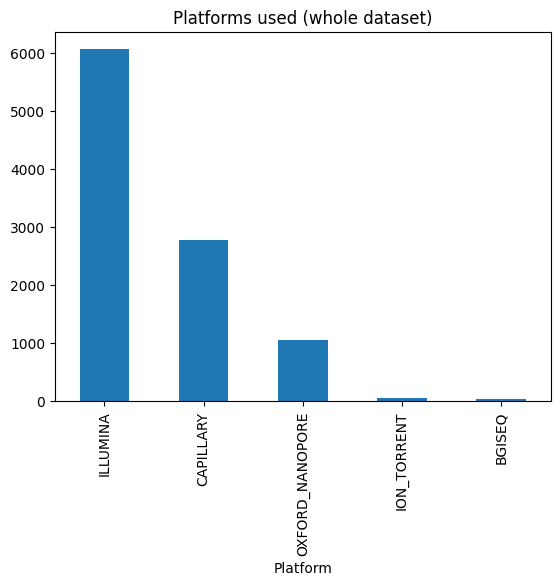

In [183]:
dataset["Platform"].value_counts().plot(kind = 'bar')
plt.title("Platforms used (whole dataset)")

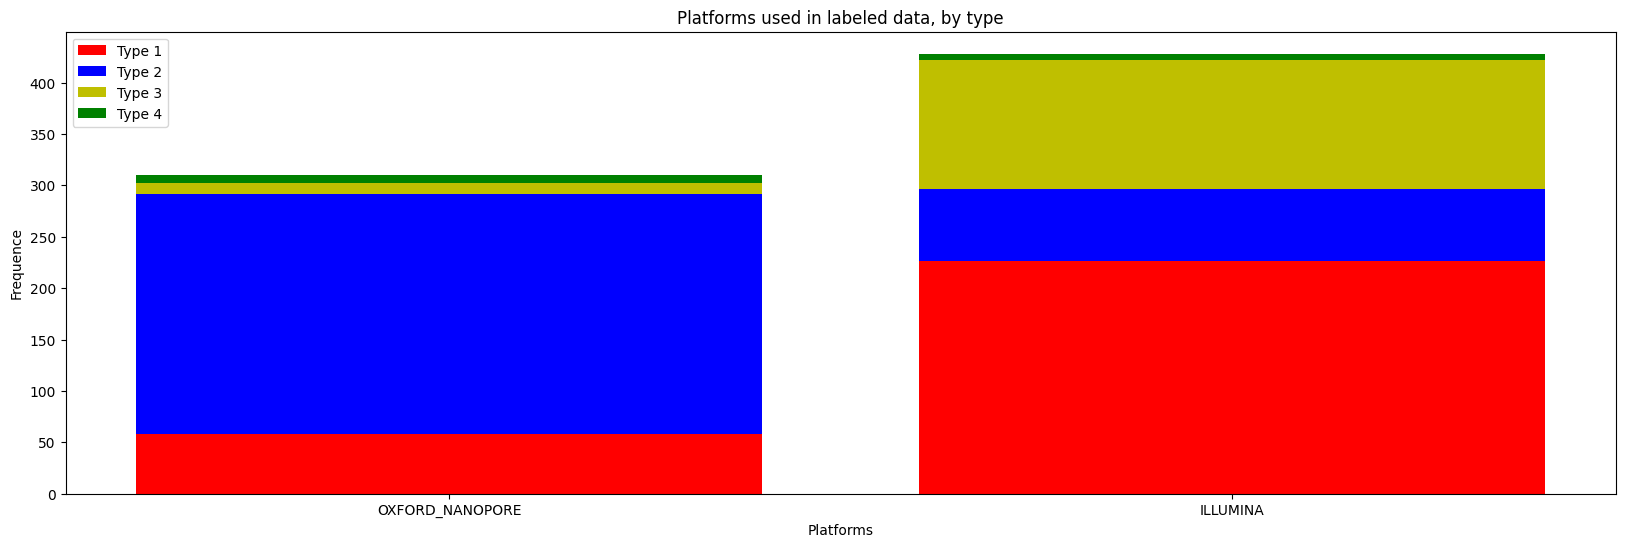

In [184]:
distinctPlatforms = labeled["Platform"].unique()
type1_platforms = np.array([type1[type1.Platform == i].shape[0] for i in distinctPlatforms])
type2_platforms = np.array([type2[type2.Platform == i].shape[0] for i in distinctPlatforms])
type3_platforms = np.array([type3[type3.Platform == i].shape[0] for i in distinctPlatforms])
type4_platforms = np.array([type4[type4.Platform == i].shape[0] for i in distinctPlatforms])

plt.figure(figsize=(20, 6))
plt.bar(distinctPlatforms, type1_platforms, color='r')
plt.bar(distinctPlatforms, type2_platforms, bottom=type1_platforms, color='b')
plt.bar(distinctPlatforms, type3_platforms, bottom=type1_platforms + type2_platforms, color='y')
plt.bar(distinctPlatforms, type4_platforms, bottom=type1_platforms + type2_platforms + type3_platforms, color='g')
plt.xlabel("Platforms")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Platforms used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Models used (whole dataset)')

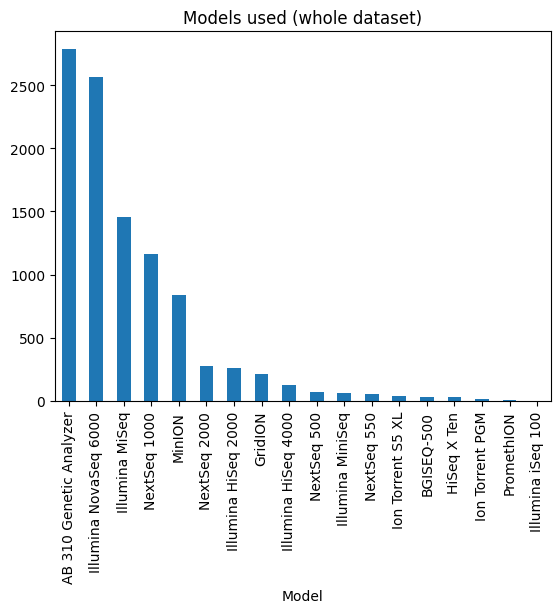

In [185]:
dataset["Model"].value_counts().plot(kind = 'bar')
plt.title("Models used (whole dataset)")

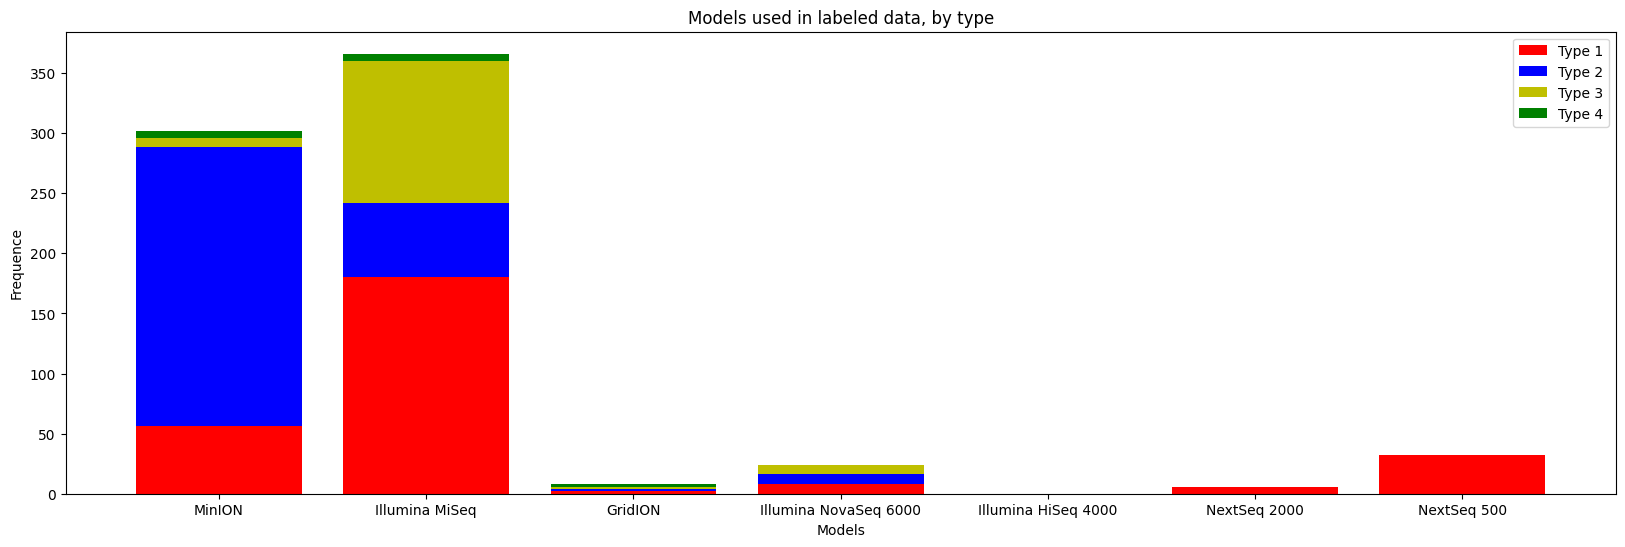

In [186]:
distinctModels = labeled["Model"].unique()
type1_models = np.array([type1[type1.Model == i].shape[0] for i in distinctModels])
type2_models = np.array([type2[type2.Model == i].shape[0] for i in distinctModels])
type3_models = np.array([type3[type3.Model == i].shape[0] for i in distinctModels])
type4_models = np.array([type4[type4.Model == i].shape[0] for i in distinctModels])

plt.figure(figsize=(20, 6))
plt.bar(distinctModels, type1_models, color='r')
plt.bar(distinctModels, type2_models, bottom=type1_models, color='b')
plt.bar(distinctModels, type3_models, bottom=type1_models + type2_models, color='y')
plt.bar(distinctModels, type4_models, bottom=type1_models + type2_models + type3_models, color='g')
plt.xlabel("Models")
plt.ylabel("Frequence")
plt.legend(["Type 1", "Type 2", "Type 3", "Type 4"])
plt.title("Models used in labeled data, by type")
plt.show()

Text(0.5, 1.0, 'Models used (type 4 only, for visibility)')

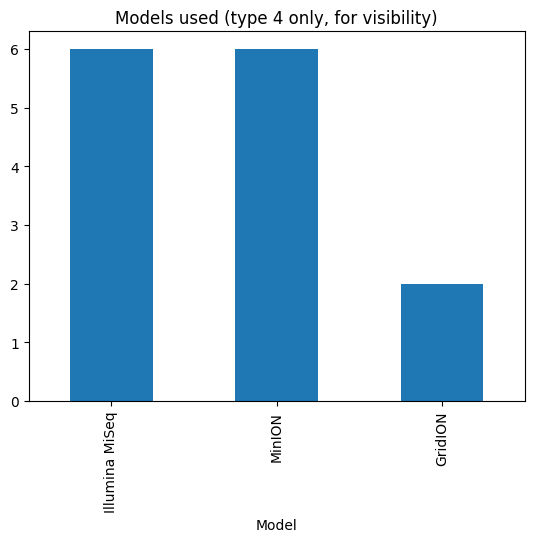

In [187]:
type4["Model"].value_counts().plot(kind = 'bar')
plt.title("Models used (type 4 only, for visibility)")

In [188]:
dataset["Run"].value_counts() # This is quite suspicious, I will look into it

Run
SRR18911350    2
SRR15998134    2
SRR11071800    2
SRR11071799    2
SRR11071788    2
              ..
SRR12578628    2
SRR15998133    2
SRR15998131    2
SRR11071782    2
SRR11071783    2
Name: count, Length: 5000, dtype: int64

Text(0.5, 0, 'avgLength')

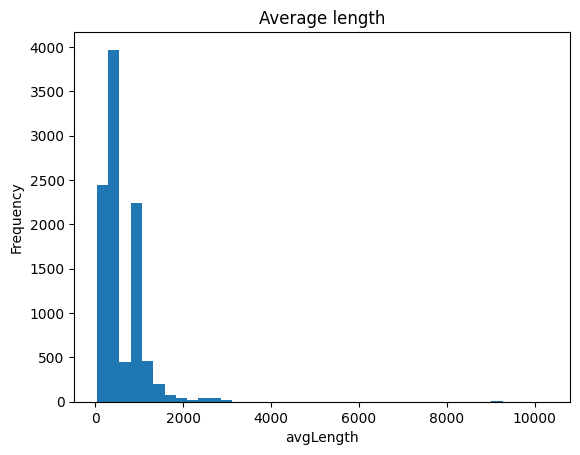

In [189]:
plt.hist(dataset["avgLength"], 40)
dataset.nlargest(10, ["avgLength"])
plt.title("Average length")
plt.ylabel("Frequency")
plt.xlabel("avgLength")

Text(0.5, 0, 'size_MB')

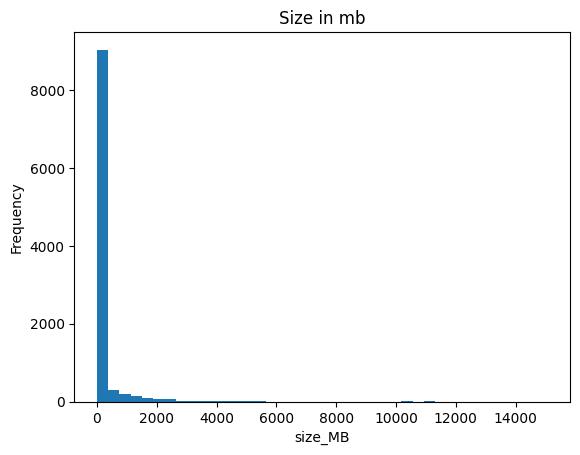

In [190]:
plt.hist(dataset["size_MB"], 40)
dataset.nlargest(10, ["size_MB"])
plt.title("Size in mb")
plt.ylabel("Frequency")
plt.xlabel("size_MB")

Text(0, 0.5, 'Frequency')

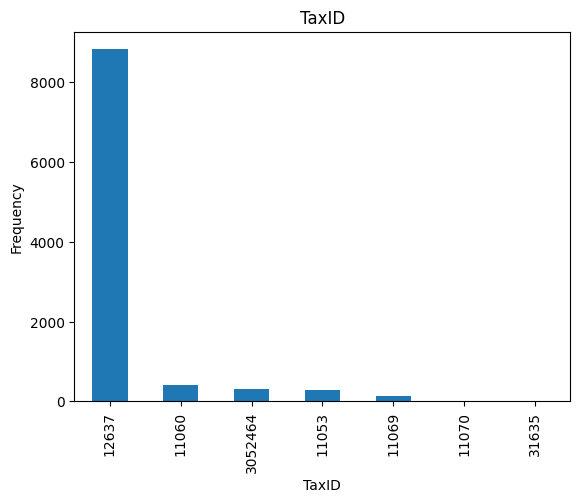

In [203]:
dataset["TaxID"].value_counts().plot(kind = "bar")
plt.title("TaxID")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

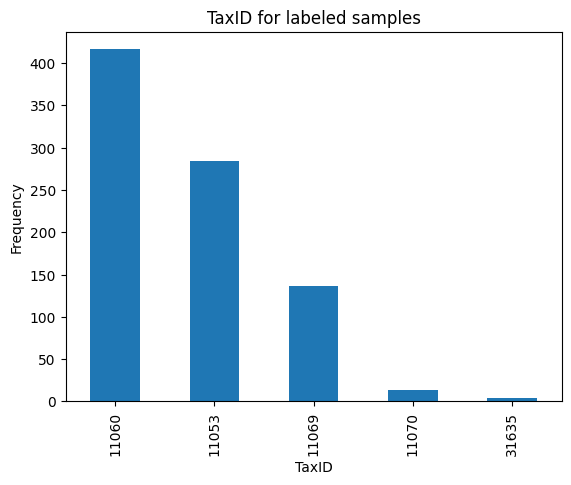

In [201]:
labeled["TaxID"].value_counts().plot(kind = "bar")
plt.title("TaxID for labeled samples")
plt.ylabel("Frequency")

In [200]:
print("TaxID for type 1")
print(type1["TaxID"].value_counts())
print("-------------------")
print("TaxID for type 2")
print(type2["TaxID"].value_counts())
print("-------------------")
print("TaxID for type 3")
print(type3["TaxID"].value_counts())
print("-------------------")
print("TaxID for type 4")
print(type4["TaxID"].value_counts())


TaxID for type 1
TaxID
11053    284
Name: count, dtype: int64
-------------------
TaxID for type 2
TaxID
11060    300
31635      4
Name: count, dtype: int64
-------------------
TaxID for type 3
TaxID
11069    136
Name: count, dtype: int64
-------------------
TaxID for type 4
TaxID
11070    14
Name: count, dtype: int64


In [205]:
dataset["SampleType"].value_counts()

SampleType
simple    10000
Name: count, dtype: int64

In [219]:
print("Sample in all data")
print(dataset["Sample"].value_counts())
print("------------------")
print("Sample in labeled data")
print(labeled["Sample"].value_counts())

Sample in all data
Sample
SRS5003210     2786
SRS16968265       6
SRS19653344       4
SRS19653224       4
SRS19653223       4
               ... 
SRS17213065       2
SRS20359821       2
SRS20359743       2
SRS20359822       2
SRS17212992       2
Name: count, Length: 3525, dtype: int64
------------------
Sample in labeled data
Sample
SRS24156724    2
SRS6134932     2
SRS6134933     2
SRS6134944     2
SRS6134945     2
              ..
SRS6134938     2
SRS6134942     2
SRS6134937     2
SRS6134936     2
SRS6134935     2
Name: count, Length: 427, dtype: int64


With only one exception, all samples seem (mostly) distinct. TODO: see why


In [220]:
print("BioSample in all data")
print(dataset["BioSample"].value_counts())
print("------------------")
print("BioSample in labeled data")
print(labeled["BioSample"].value_counts()) # Seems to be the same as before, TODO: verify this

BioSample in all data
BioSample
SAMN12110434    2786
SAMN33611438       6
SAMN38455815       4
SAMN38455843       4
SAMN38455842       4
                ... 
SAMN34057377       2
SAMN39748748       2
SAMN39748802       2
SAMN39748749       2
SAMN34057233       2
Name: count, Length: 3525, dtype: int64
------------------
BioSample in labeled data
BioSample
SAMN46903799    2
SAMN13897078    2
SAMN13897079    2
SAMN13897080    2
SAMN13897081    2
               ..
SAMN13897072    2
SAMN13897076    2
SAMN13897071    2
SAMN13897070    2
SAMN13897069    2
Name: count, Length: 427, dtype: int64


In [217]:
print("BioProject in all data")
print(dataset["BioProject"].value_counts())
print("------------------")
print("BioProject in labeled data")
print(labeled["BioProject"].value_counts())

BioProject in all data
BioProject
PRJNA1072696    1192
PRJNA973096      920
PRJNA951702      690
PRJNA1045842     492
PRJNA1132139     332
                ... 
PRJNA765316        2
PRJNA729800        2
PRJNA595927        2
PRJNA1216219       2
PRJNA1052714       2
Name: count, Length: 81, dtype: int64
------------------
BioProject in labeled data
BioProject
PRJNA1212489    278
PRJNA814204     144
PRJEB71472      130
PRJNA811700      88
PRJNA606238      40
PRJNA662334      34
PRJNA725703      32
PRJNA941915      24
PRJEB89228       24
PRJNA1242886     22
PRJNA1005611     14
PRJNA1118493      6
PRJNA979106       6
PRJEB66350        4
PRJNA575805       4
PRJNA1118487      2
PRJNA1052714      2
Name: count, dtype: int64


In [222]:
print("SRAStudy in all data")
print(dataset["SRAStudy"].value_counts())
print("------------------")
print("SRAStudy in labeled data")
print(labeled["SRAStudy"].value_counts()) # The 2786 samples with SRAStudy SRP202294 seem to have an empty BioProject field, TODO: check

SRAStudy in all data
SRAStudy
SRP202294    2786
SRP487774    1192
SRP450554     920
SRP430629     690
SRP474537     492
             ... 
SRP338207       2
SRP319773       2
SRP237710       2
SRP560131       2
SRP497892       2
Name: count, Length: 82, dtype: int64
------------------
SRAStudy in labeled data
SRAStudy
SRP565854    278
SRP363178    144
ERP156272    130
SRP362090     88
SRP248407     40
SRP281234     34
SRP316685     32
SRP425958     24
ERP172269     24
SRP573686     22
SRP455139     14
SRP510978      6
SRP440819      6
ERP151415      4
SRP224336      4
SRP510973      2
SRP497892      2
Name: count, dtype: int64
